# <font color='red'>Movie Recommender System Based on Cosine Similarity & Pearson Correlation</font>

<font color='blue', size = 4>This is a simple implemntation of a movie recommender system based on collaborative filtering approach. We are usring 'Cosine Similarity' and 'Pearson Correlation' functions to find the similar movies to recommend for new users. The dataset used here is MovieLens 100k dataset.</font>

## Index
### 1. Data
### 2. Priliminary Analysis of Data
### 3. Finding 'Popular' Movies
### 4. Movie Recommendation Using Cosine Similarity
### 5. Movie Recommendation Using Pearson Correlation
### 6. Comparison between Cosine Similarity and Pearson Correlation

In [1]:
# Import Python libraries Pandas, NumPy, Matplotlib, sklearn

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline

## <font color='green'>1. Data</font>

In [2]:
# Import CSV files and convert them into Pandas data-frames
# 1) The full u data set, 100000 ratings by 943 users on 1682 items. Each user has rated at least 20 movies.
#    Users and items are numbered consecutively from 1. (user_rating_df)
# 2) Information about the items (movies). The last 19 fields are the genres, a 1 indicates the movie
#    is of that genre, a 0 indicates it is not; movies can be in several genres at once.
#    The movie ids are the ones used in the u.data data set. (movies_df)
# 3) Demographic information about the users. The user ids are the ones used in the u.data data set. (user_df)


rating_col_names = ['user_id', 'item_id', 'rating', 'timestamp']
user_rating_df = pd.read_csv('ml-100k/u.data', sep='\t', encoding='utf-8', names = rating_col_names)

movie_col_names = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
                   'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
                   'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movie_df = pd.read_csv('ml-100k/u.item', sep ='|', encoding = 'latin', names = movie_col_names)

user_col_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user_df = pd.read_csv('ml-100k/u.user', encoding='utf-8', sep='|', names = user_col_names)

print "First 5 lines of user_rating_df:\n\n",user_rating_df.head()
print "\nShape of user_rating_df:",user_rating_df.shape

print "\n\nFirst 5 lines of movie_df:\n\n",movie_df.head()
print "\n\nShape of movie_df:",movie_df.shape

print "\n\nFirst 5 lines of user_df:\n\n",user_df.head()
print "\n\nShape of user_df:",user_df.shape

First 5 lines of user_rating_df:

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

Shape of user_rating_df: (100000, 4)


First 5 lines of movie_df:

   movie_id        movie_title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%2

## <font color = 'green'>2. Priliminary Analysis of Data</font>

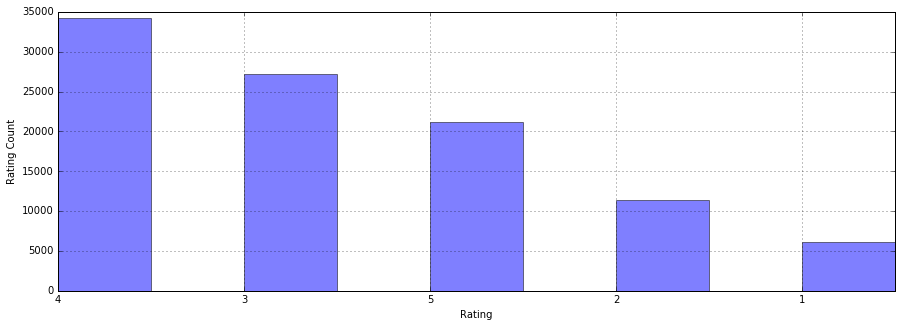

In [3]:
# Ploting the value counts of 'rating'. This will give a brief understanding about the distribution of 'rating' by different 
# users on movies.

# Convert 'rating' column of DF into pandas series
rating_counts = user_rating_df['rating'].value_counts()

# Rating values (Eg: 1, 2, 3...5)
rating_value = rating_counts.keys()

# Number of ratings given by the users
r_counts = rating_counts.tolist()

# Plotting rating count distribution bar graph

x_pos = np.arange(len(rating_value))
plt.figure(figsize=(15,5))
plt.bar(x_pos, r_counts, align = 'edge', alpha = .5, width = .5)
plt.xticks(x_pos, rating_value)
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.grid()

In [4]:
# Ploting the value counts of 'genre' of movies. This will give a brief understanding about the distribution of different
# 'genre' of movies.

# Movie genre count function
def movie_genre_counter(genre_list, df):
    """Return dictionary of movie genres.
    Key of dict is the name of genre and values are value count of that genre"""
    genre_counter = {}
    for i in genre_list:
        genre_counter[i] = df[i].value_counts()[1]
    return genre_counter

# Extract 'genre's from movie_df to find the value counts
movie_genre = movie_df.columns[5:]

# Calling function
movier_genre_counter = movie_genre_counter(movie_genre, movie_df)

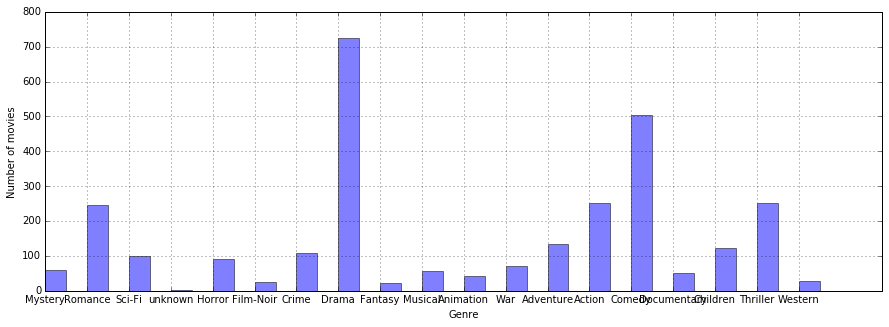

In [5]:
# Plotting the genre count of total movies

genre_name = movier_genre_counter.keys()
g_counts = movier_genre_counter.values()

# Bar graph
x1_pos = np.arange(len(genre_name))
plt.figure(figsize=(15,5))
plt.bar(x1_pos, g_counts, align = 'edge', alpha = .5, width = .5)
plt.xticks(x1_pos, genre_name)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.grid()

## <font color='green'>3. Finding 'Popular' Movies</font>

In [6]:
# Find movies which are rated by maximum users
# Find movies which have very high mean rating


# Movies and their total number of users who rated those movies
popular_movie_df = pd.DataFrame(user_rating_df.groupby('item_id')['rating'].count())

# Average rating of the movie
popular_movie_df['avg_rating'] = pd.DataFrame(user_rating_df.groupby('item_id')['rating'].mean())

# Sorting 
print popular_movie_df.sort_values('rating', ascending=False).head()
print popular_movie_df.shape

         rating  avg_rating
item_id                    
50          583    4.358491
258         509    3.803536
100         508    4.155512
181         507    4.007890
294         485    3.156701
(1682, 2)


In [7]:
# Duplicate the data frame movie_df to new_movie_df with index as movie_id
new_movie_df = movie_df.set_index('movie_id')

In [8]:
# Movie name finder function
def movie_id_name_mathcer(*args):
    """
    Return the correspoding movie names of given movie_id's in dictionary format
    """
    id_movie = {}
    for arg in args:
        movie_name = new_movie_df['movie_title'][new_movie_df.index == arg]
        id_movie[arg] = movie_name[arg]
    return id_movie

In [9]:
# Movie(popular) names from movie_id's 
movie_id_name_mathcer(50, 258, 100, 181, 294)

{50: u'Star Wars (1977)',
 100: u'Fargo (1996)',
 181: u'Return of the Jedi (1983)',
 258: u'Contact (1997)',
 294: u'Liar Liar (1997)'}

## <font color='green'>4. Movie Recommendation Using Cosine Similarity </font> 

In [10]:
# Create a large sparse Rating-Matrix with user_id, item_id and ratings

rating_df_pivot = user_rating_df.pivot(index='user_id', columns='item_id').rating.fillna(0)
print "Shape of Pivoted_matrix:", rating_df_pivot.shape
print "\nFirst 5 lines of Pivoted_matrix\n\n", rating_df_pivot.head()

Shape of Pivoted_matrix: (943, 1682)

First 5 lines of Pivoted_matrix

item_id  1     2     3     4     5     6     7     8     9     10    ...   \
user_id                                                              ...    
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...    
2         4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...    
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    
5         4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0  

In [11]:
# Cosine similarity measurement between movies (columns)
cos_similer = cosine_similarity(rating_df_pivot.T)

# Cosine similarity martix
cos_similer

array([[ 1.        ,  0.40238218,  0.33024479, ...,  0.        ,
         0.04718307,  0.04718307],
       [ 0.40238218,  1.        ,  0.27306918, ...,  0.        ,
         0.07829936,  0.07829936],
       [ 0.33024479,  0.27306918,  1.        , ...,  0.        ,
         0.        ,  0.09687505],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.04718307,  0.07829936,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04718307,  0.07829936,  0.09687505, ...,  0.        ,
         0.        ,  1.        ]])

In [12]:

# Movie name finder function
def movie_id_name_mathcer(*args):
    """
    Return the correspoding movie names of given movie_id's in dictionary format
    """
    id_movie = {}
    for arg in args:
        movie_name = new_movie_df['movie_title'][new_movie_df.index == arg]
        id_movie[arg] = movie_name[arg]
    return id_movie


# Cosinr similar movies finder function
def cosine_similar_movies(mov_id):
    """
    Return 20 movie_ids and their names in dictionary format, similar to the movie_id passes as
    an argument to this function. Similarity measurement is based on cosine similarity measurement.
    """
    movie_liz = []
    
    # Find the cosine similarity measurement vector for 'mov_id' from cos_similar NumPy array and convert to a list
    cos_list = cos_similer[mov_id-1].tolist()
    
    # Convert cosine similarity measurement list to enumerated dictionary format.
    # Keys are now movie_id's and values are cosine similarity measurement
    dic_cos_list = dict(enumerate(cos_list, 1))
    
    # Sort the dictionary in the descending overder of values and convert back to list
    sorted_dic_cos_list = sorted(dic_cos_list.items(), key=lambda x:x[1], reverse = True)
    
    # Slice the first 20 movies from the list
    first_20_movies = sorted_dic_cos_list[:20]
    
    
    for j in first_20_movies:
        # Call movie_id_name_matcher function to get the name of the movie
        k = movie_id_name_mathcer(j[0])
        movie_liz.append(k)
        
    return movie_liz


In [74]:
# Find the 20 movies similar to the movie 'Carrie' (movie_id = 447)
cosine_similar_movies(447)

[{447: u'Carrie (1976)'},
 {219: u'Nightmare on Elm Street, A (1984)'},
 {448: u'Omen, The (1976)'},
 {218: u'Cape Fear (1991)'},
 {200: u'Shining, The (1980)'},
 {559: u'Interview with the Vampire (1994)'},
 {234: u'Jaws (1975)'},
 {443: u'Birds, The (1963)'},
 {185: u'Psycho (1960)'},
 {436: u'American Werewolf in London, An (1981)'},
 {217: u"Bram Stoker's Dracula (1992)"},
 {98: u'Silence of the Lambs, The (1991)'},
 {183: u'Alien (1979)'},
 {195: u'Terminator, The (1984)'},
 {56: u'Pulp Fiction (1994)'},
 {230: u'Star Trek IV: The Voyage Home (1986)'},
 {135: u'2001: A Space Odyssey (1968)'},
 {211: u'M*A*S*H (1970)'},
 {164: u'Abyss, The (1989)'},
 {393: u'Mrs. Doubtfire (1993)'}]

## <font color = 'green'>5. Movie Recommendation Using Pearson Correlation</font>

In [80]:
# Pearson's Correlation measurement between movies (columns)
pearson_similer = rating_df_pivot.corr()

# Pearson's Correlation martix data frame
print "Shape of pearson_similar data frame:", pearson_similer.shape
print "\n\nFirst 5 rows of pearson_similar:\n\n", pearson_similer.head()

Shape of pearson_similar data frame: (1682, 1682)


First 5 rows of pearson_similar:

item_id      1         2         3         4         5         6         7     \
item_id                                                                         
1        1.000000  0.234595  0.193362  0.226213  0.128840  0.015113  0.347354   
2        0.234595  1.000000  0.190649  0.409044  0.240712  0.030062  0.220022   
3        0.193362  0.190649  1.000000  0.227849  0.141368  0.065347  0.258855   
4        0.226213  0.409044  0.227849  1.000000  0.237298  0.021878  0.295489   
5        0.128840  0.240712  0.141368  0.237298  1.000000 -0.008594  0.205289   

item_id      8         9         10      ...         1673      1674      1675  \
item_id                                  ...                                    
1        0.254490  0.209502  0.104655    ...     0.018215 -0.029676 -0.029676   
2        0.206020  0.077894  0.072906    ...    -0.012451 -0.012451 -0.012451   
3        0.078636  0.1

In [81]:
# Movie name finder function
def movie_id_name_mathcer(*args):
    """
    Return the correspoding movie names of given movie_id's in dictionary format
    """
    id_movie = {}
    for arg in args:
        movie_name = new_movie_df['movie_title'][new_movie_df.index == arg]
        id_movie[arg] = movie_name[arg]
    return id_movie


# Pearson similar movies finder function
def pearson_similar_movies(mov_id):
    """
    Return 20 movie_ids and their names in dictionary format, similar to the movie_id passes as
    an argument to this function. Similarity measurement is based on pearson correlation measurement.
    """
    movie_lizt = []
    
    # Find the pearson correlation measurement column for 'mov_id' from pearson_similar data frame and convert to a list
    pearson_list = pearson_similer[mov_id].tolist()
    
    # Convert pearson correlation measurement list to enumerated dictionary format.
    # Keys are now movie_id's and values are pearson correlation measurement
    dic_pear_list = dict(enumerate(pearson_list, 1))
    
    # Sort the dictionary in the descending overder of values and convert back to list
    sorted_dic_pear_list = sorted(dic_pear_list.items(), key=lambda x:x[1], reverse = True)
    
    # Slice the first 20 movies from the list
    first_20_movies_pear = sorted_dic_pear_list[:20]
    
    
    for k in first_20_movies_pear:
        # Call movie_id_name_matcher function to get the name of the movie
        l = movie_id_name_mathcer(k[0])
        movie_lizt.append(l)
        
    return movie_lizt


In [82]:
pearson_similar_movies(447)

[{447: u'Carrie (1976)'},
 {219: u'Nightmare on Elm Street, A (1984)'},
 {448: u'Omen, The (1976)'},
 {218: u'Cape Fear (1991)'},
 {200: u'Shining, The (1980)'},
 {559: u'Interview with the Vampire (1994)'},
 {436: u'American Werewolf in London, An (1981)'},
 {443: u'Birds, The (1963)'},
 {234: u'Jaws (1975)'},
 {185: u'Psycho (1960)'},
 {217: u"Bram Stoker's Dracula (1992)"},
 {444: u'Blob, The (1958)'},
 {441: u'Amityville Horror, The (1979)'},
 {637: u'Howling, The (1981)'},
 {452: u'Jaws 2 (1978)'},
 {674: u'Cat People (1982)'},
 {98: u'Silence of the Lambs, The (1991)'},
 {671: u'Bride of Frankenstein (1935)'},
 {636: u'Escape from New York (1981)'},
 {53: u'Natural Born Killers (1994)'}]

## <font color='green'>6. Comparison between Cosine Similarity and Pearson Correlation</font>

In [83]:
# Similar movies to 'The Jungle Book' (movie_id: 465)

print "Cosine Similarity:\n", cosine_similar_movies(465)
print "\n\nPearson Similarity:\n", pearson_similar_movies(465)

Cosine Similarity:
[{465: u'Jungle Book, The (1994)'}, {99: u'Snow White and the Seven Dwarfs (1937)'}, {404: u'Pinocchio (1940)'}, {393: u'Mrs. Doubtfire (1993)'}, {419: u'Mary Poppins (1964)'}, {588: u'Beauty and the Beast (1991)'}, {82: u'Jurassic Park (1993)'}, {71: u'Lion King, The (1994)'}, {95: u'Aladdin (1992)'}, {501: u'Dumbo (1941)'}, {418: u'Cinderella (1950)'}, {420: u'Alice in Wonderland (1951)'}, {423: u'E.T. the Extra-Terrestrial (1982)'}, {102: u'Aristocats, The (1970)'}, {622: u'Swiss Family Robinson (1960)'}, {140: u'Homeward Bound: The Incredible Journey (1993)'}, {94: u'Home Alone (1990)'}, {143: u'Sound of Music, The (1965)'}, {768: u'Casper (1995)'}, {73: u'Maverick (1994)'}]


Pearson Similarity:
[{465: u'Jungle Book, The (1994)'}, {404: u'Pinocchio (1940)'}, {99: u'Snow White and the Seven Dwarfs (1937)'}, {393: u'Mrs. Doubtfire (1993)'}, {419: u'Mary Poppins (1964)'}, {622: u'Swiss Family Robinson (1960)'}, {102: u'Aristocats, The (1970)'}, {420: u'Alice in Won

In [84]:
# Similar movies to 'Con Air' (movie_id: 1016)

print "Cosine Similarity:\n", cosine_similar_movies(1016)
print "\n\nPearson Similarity:\n", pearson_similar_movies(1016)

Cosine Similarity:
[{1016: u'Con Air (1997)'}, {298: u'Face/Off (1997)'}, {117: u'Rock, The (1996)'}, {405: u'Mission: Impossible (1996)'}, {252: u'Lost World: Jurassic Park, The (1997)'}, {742: u'Ransom (1996)'}, {250: u'Fifth Element, The (1997)'}, {257: u'Men in Black (1997)'}, {121: u'Independence Day (ID4) (1996)'}, {249: u'Austin Powers: International Man of Mystery (1997)'}, {24: u'Rumble in the Bronx (1995)'}, {248: u'Grosse Pointe Blank (1997)'}, {597: u'Eraser (1996)'}, {685: u'Executive Decision (1996)'}, {181: u'Return of the Jedi (1983)'}, {282: u'Time to Kill, A (1996)'}, {118: u'Twister (1996)'}, {222: u'Star Trek: First Contact (1996)'}, {125: u'Phenomenon (1996)'}, {546: u'Broken Arrow (1996)'}]


Pearson Similarity:
[{1016: u'Con Air (1997)'}, {298: u'Face/Off (1997)'}, {117: u'Rock, The (1996)'}, {252: u'Lost World: Jurassic Park, The (1997)'}, {405: u'Mission: Impossible (1996)'}, {250: u'Fifth Element, The (1997)'}, {742: u'Ransom (1996)'}, {1244: u'Metro (1997)'},

In [85]:
# Similar movies to 'Austin Powers: International Man of Mystery' (movie_id: 249)

print "Cosine Similarity:\n", cosine_similar_movies(249)
print "\n\nPearson Similarity:\n", pearson_similar_movies(249)

Cosine Similarity:
[{249: u'Austin Powers: International Man of Mystery (1997)'}, {257: u'Men in Black (1997)'}, {250: u'Fifth Element, The (1997)'}, {248: u'Grosse Pointe Blank (1997)'}, {298: u'Face/Off (1997)'}, {1016: u'Con Air (1997)'}, {122: u'Cable Guy, The (1996)'}, {240: u'Beavis and Butt-head Do America (1996)'}, {24: u'Rumble in the Bronx (1995)'}, {405: u'Mission: Impossible (1996)'}, {181: u'Return of the Jedi (1983)'}, {763: u'Happy Gilmore (1996)'}, {1012: u'Private Parts (1997)'}, {50: u'Star Wars (1977)'}, {109: u'Mystery Science Theater 3000: The Movie (1996)'}, {117: u'Rock, The (1996)'}, {411: u'Nutty Professor, The (1996)'}, {246: u'Chasing Amy (1997)'}, {121: u'Independence Day (ID4) (1996)'}, {156: u'Reservoir Dogs (1992)'}]


Pearson Similarity:
[{249: u'Austin Powers: International Man of Mystery (1997)'}, {250: u'Fifth Element, The (1997)'}, {248: u'Grosse Pointe Blank (1997)'}, {1016: u'Con Air (1997)'}, {122: u'Cable Guy, The (1996)'}, {257: u'Men in Black (